In [21]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

%matplotlib inline

In [22]:
#read csv file
df = pd.read_csv('D:/Blog/Placing a Runway/1554085.csv')

In [23]:
df.head(5)

,STATION,NAME,DATE,HLY-CLDH-NORMAL,HLY-CLOD-PCTBKN,HLY-CLOD-PCTCLR,HLY-CLOD-PCTFEW,HLY-CLOD-PCTOVC,HLY-CLOD-PCTSCT,HLY-DEWP-10PCTL,...,HLY-TEMP-NORMAL,HLY-WCHL-NORMAL,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD
0,USW00026451,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",01-01T01:00:00,0.0,170,110,99,528,94,-5.1,...,17.2,10.2,1,272,2,184,5.9,231,20,2.6
1,USW00026451,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",01-01T02:00:00,0.0,170,109,86,558,77,-6.0,...,17.2,9.8,1,311,2,180,6.2,182,18,2.8
2,USW00026451,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",01-01T03:00:00,0.0,192,113,69,554,72,-5.1,...,17.1,10.0,1,283,2,195,6.1,196,19,2.5
3,USW00026451,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",01-01T04:00:00,0.0,161,111,66,567,95,-6.0,...,17.0,9.9,1,287,2,181,6.0,200,19,2.4
4,USW00026451,"ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A...",01-01T05:00:00,0.0,169,107,73,567,84,-6.0,...,17.0,10.0,1,294,2,142,6.0,213,18,2.4


In [24]:
#pandas_profiling.ProfileReport(df)

In [25]:
#drop unnecessary columns
df.drop(['STATION', 'NAME'], axis = 1, inplace=True)

In [26]:
#check the datatype of each column
df.dtypes

DATE                object
HLY-CLDH-NORMAL    float64
HLY-CLOD-PCTBKN      int64
HLY-CLOD-PCTCLR      int64
HLY-CLOD-PCTFEW      int64
HLY-CLOD-PCTOVC      int64
HLY-CLOD-PCTSCT      int64
HLY-DEWP-10PCTL    float64
HLY-DEWP-90PCTL    float64
HLY-DEWP-NORMAL    float64
HLY-HIDX-NORMAL    float64
HLY-HTDH-NORMAL    float64
HLY-PRES-10PCTL    float64
HLY-PRES-90PCTL    float64
HLY-PRES-NORMAL    float64
HLY-TEMP-10PCTL    float64
HLY-TEMP-90PCTL    float64
HLY-TEMP-NORMAL    float64
HLY-WCHL-NORMAL    float64
HLY-WIND-1STDIR      int64
HLY-WIND-1STPCT      int64
HLY-WIND-2NDDIR      int64
HLY-WIND-2NDPCT      int64
HLY-WIND-AVGSPD    float64
HLY-WIND-PCTCLM      int64
HLY-WIND-VCTDIR      int64
HLY-WIND-VCTSPD    float64
dtype: object

In [27]:
#Convert the date column to a datetime data type
df['DATE'] = pd.to_datetime(df['DATE'], format='%m-%dT%H:%M:%S') + pd.DateOffset(years=2010-1900)

#set the sample time to the index
df.set_index('DATE', inplace=True)

#review the dataframe
df.head()

,HLY-CLDH-NORMAL,HLY-CLOD-PCTBKN,HLY-CLOD-PCTCLR,HLY-CLOD-PCTFEW,HLY-CLOD-PCTOVC,HLY-CLOD-PCTSCT,HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,HLY-DEWP-NORMAL,HLY-HIDX-NORMAL,...,HLY-TEMP-NORMAL,HLY-WCHL-NORMAL,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00,0.0,170,110,99,528,94,-5.1,27.0,11.7,17.2,...,17.2,10.2,1,272,2,184,5.9,231,20,2.6
2010-01-01 02:00:00,0.0,170,109,86,558,77,-6.0,27.0,11.7,17.2,...,17.2,9.8,1,311,2,180,6.2,182,18,2.8
2010-01-01 03:00:00,0.0,192,113,69,554,72,-5.1,27.0,11.7,17.1,...,17.1,10.0,1,283,2,195,6.1,196,19,2.5
2010-01-01 04:00:00,0.0,161,111,66,567,95,-6.0,27.0,11.5,17.0,...,17.0,9.9,1,287,2,181,6.0,200,19,2.4
2010-01-01 05:00:00,0.0,169,107,73,567,84,-6.0,27.0,11.6,17.0,...,17.0,10.0,1,294,2,142,6.0,213,18,2.4


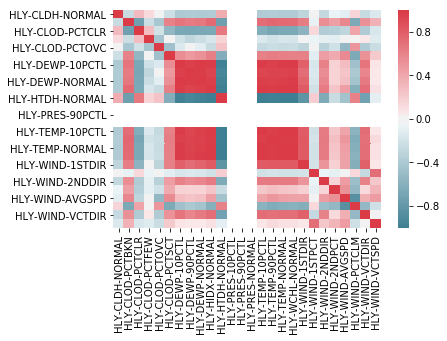

In [28]:
#Plot a correlation matrix of the data
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True));

Pressure data looks weird...

In [29]:
#review the pressure reading data
df[['HLY-PRES-10PCTL', 'HLY-PRES-90PCTL', 'HLY-PRES-NORMAL']].describe()

,HLY-PRES-10PCTL,HLY-PRES-90PCTL,HLY-PRES-NORMAL
count,8687.0,8687.0,8687.0
mean,1.0,1.0,1.0
std,0.0,0.0,0.0
min,1.0,1.0,1.0
25%,1.0,1.0,1.0
50%,1.0,1.0,1.0
75%,1.0,1.0,1.0
max,1.0,1.0,1.0


In [30]:
#remove the pressure data
df.drop(['HLY-PRES-10PCTL', 'HLY-PRES-90PCTL', 'HLY-PRES-NORMAL'], inplace=True, axis=1)

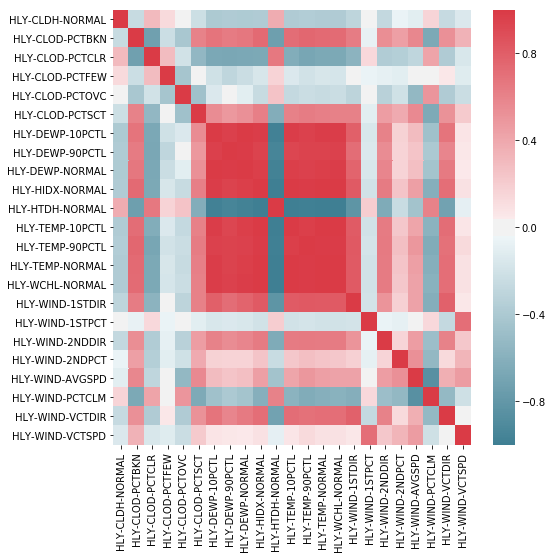

In [31]:
#Plot a correlation matrix of the data
plt.figure(figsize=[8,8])
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True));
plt.savefig('wx_xcorr.png', dpi = 300)

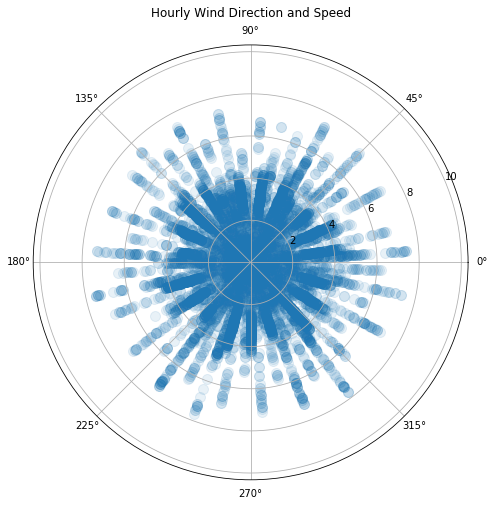

In [32]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(df['HLY-WIND-VCTDIR'].values, df['HLY-WIND-VCTSPD'].values, alpha=0.1, s=100)
plt.title('Hourly Wind Direction and Speed');
plt.savefig('hourly_wind_all.png', dpi = 300)

In [33]:
daytime_df = df.between_time('9:00','18:00')
nighttime_df = df.between_time('23:00', '4:00')
morning_df = df.between_time('07:00', '09:00')

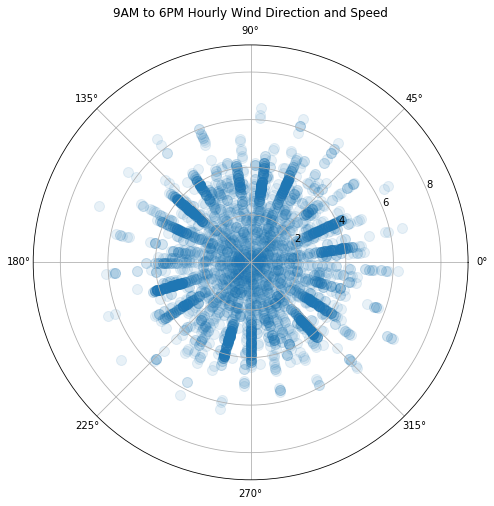

In [34]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(daytime_df['HLY-WIND-VCTDIR'].values, daytime_df['HLY-WIND-VCTSPD'].values, alpha=0.1, s=100)
plt.title('9AM to 6PM Hourly Wind Direction and Speed');
plt.savefig('hourly_wind_day.png', dpi = 300)

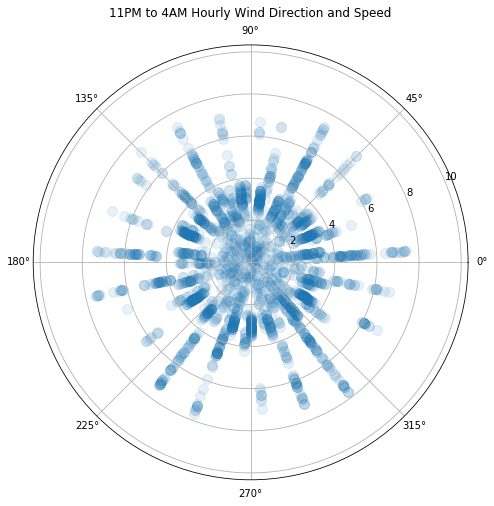

In [35]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(nighttime_df['HLY-WIND-VCTDIR'].values, nighttime_df['HLY-WIND-VCTSPD'].values, alpha=0.1, s=100)
plt.title('11PM to 4AM Hourly Wind Direction and Speed');
plt.savefig('hourly_wind_night.png', dpi = 300)

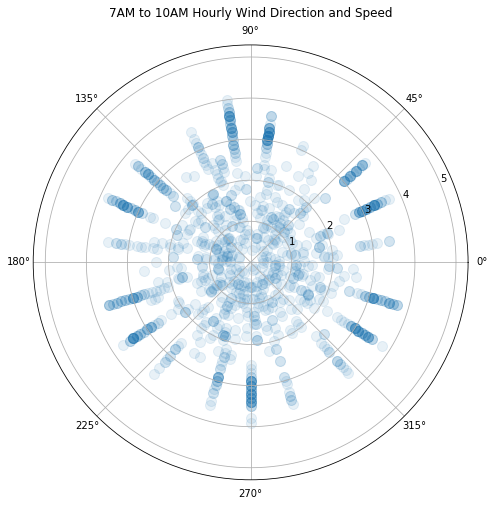

In [36]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(morning_df['HLY-WIND-VCTDIR'].values, morning_df['HLY-WIND-VCTSPD'].values, alpha=0.1, s=100)
plt.title('7AM to 10AM Hourly Wind Direction and Speed');
plt.savefig('hourly_wind_morning.png', dpi = 300)

In [37]:
daytime_df[['HLY-CLOD-PCTOVC', 'HLY-CLOD-PCTBKN', 'HLY-CLOD-PCTCLR', 'HLY-CLOD-PCTSCT', 'HLY-CLOD-PCTFEW']] = \
daytime_df[['HLY-CLOD-PCTOVC', 'HLY-CLOD-PCTBKN', 'HLY-CLOD-PCTCLR', 'HLY-CLOD-PCTSCT', 'HLY-CLOD-PCTFEW']] / 10

C:\Users\kbusby\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


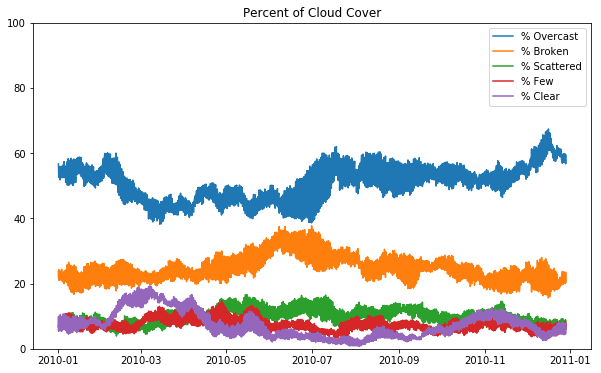

In [42]:
fig = plt.figure(figsize=[10,6])
plt.plot(daytime_df[['HLY-CLOD-PCTOVC', 'HLY-CLOD-PCTBKN', 'HLY-CLOD-PCTSCT', 'HLY-CLOD-PCTFEW', 'HLY-CLOD-PCTCLR']])
plt.title('Percent of Cloud Cover')
plt.legend(['% Overcast', '% Broken','% Scattered', '% Few', '% Clear']);
plt.ylim(0,100);
plt.savefig('cloud_cover_percentages.png', dpi = 300)

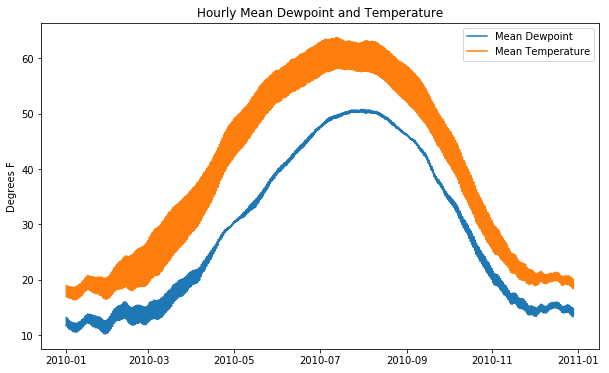

In [55]:
fig = plt.figure(figsize=[10,6])
plt.plot(daytime_df[['HLY-DEWP-NORMAL', 'HLY-TEMP-NORMAL']])
plt.legend(['Mean Dewpoint', 'Mean Temperature'])
plt.ylabel('Degrees F')
plt.title('Hourly Mean Dewpoint and Temperature')
plt.savefig('dewpoint_and_temp.png', dpi = 300)

In [53]:
daytime_df['HLY-RH-NORMAL'] = 100 - 25/9*(daytime_df['HLY-TEMP-NORMAL'] - daytime_df['HLY-DEWP-NORMAL'])
daytime_df.head()

C:\Users\kbusby\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,HLY-CLDH-NORMAL,HLY-CLOD-PCTBKN,HLY-CLOD-PCTCLR,HLY-CLOD-PCTFEW,HLY-CLOD-PCTOVC,HLY-CLOD-PCTSCT,HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,HLY-DEWP-NORMAL,HLY-HIDX-NORMAL,...,HLY-WCHL-NORMAL,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD,HLY-RH-NORMAL
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-01 09:00:00,0.0,22.3,6.7,7.2,56.7,7.0,-6.0,27.0,11.7,17.0,...,9.8,1,284,2,169,6.0,209,13,2.9,85.277778
2010-01-01 10:00:00,0.0,23.1,6.1,8.8,55.3,6.6,-6.7,28.0,11.7,17.1,...,9.7,1,300,2,162,6.2,169,6,2.8,85.000000
2010-01-01 11:00:00,0.0,23.1,5.6,9.9,53.5,7.9,-6.0,27.0,11.9,17.2,...,9.8,1,309,2,167,6.3,169,9,3.0,85.277778
2010-01-01 12:00:00,0.0,24.2,6.7,8.3,53.9,6.9,-5.1,28.0,12.6,18.1,...,10.7,1,296,2,162,6.3,167,12,2.9,84.722222
2010-01-01 13:00:00,0.0,21.5,7.0,9.5,53.3,8.6,-4.0,27.0,13.0,18.7,...,11.3,1,313,2,197,6.6,162,15,3.4,84.166667


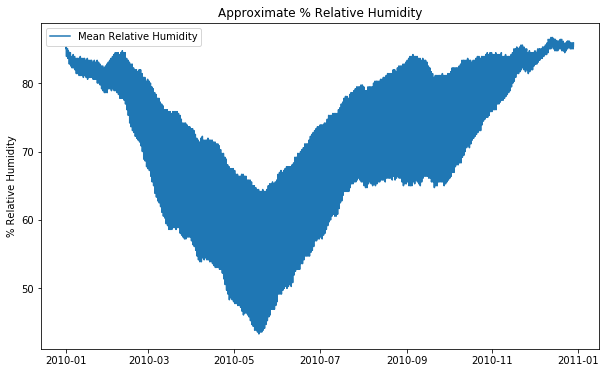

In [56]:
fig = plt.figure(figsize=[10,6])
plt.plot(daytime_df['HLY-RH-NORMAL'])
plt.legend(['Mean Relative Humidity'])
plt.ylabel('% Relative Humidity')
plt.title('Approximate % Relative Humidity')
plt.savefig('relative_humidity.png', dpi = 300)